In [28]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# MPC import
import numpy as np
from Deliverable_3_2.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [30]:
Ts = 0.05
H = 5.0

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

In [31]:
import matplotlib.pyplot as plt

sim_time = 7

x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])  # initial state
x_target = np.array([0, 0, 0, 0, 0, 0.61, 3.0, 3.0, 3.0, 0, 0, 0])  # target state

#Get Open-loop
t0 = 0.
u, x_ol, u_ol, t_ol, = mpc.get_u(t0, x0, x_target)

#Get Closed-loop
t_cl, x_cl, u_cl, _, _, _, _ = rocket.simulate_control(mpc, sim_time, H, x0, x_target = x_target, method="linear")

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating 

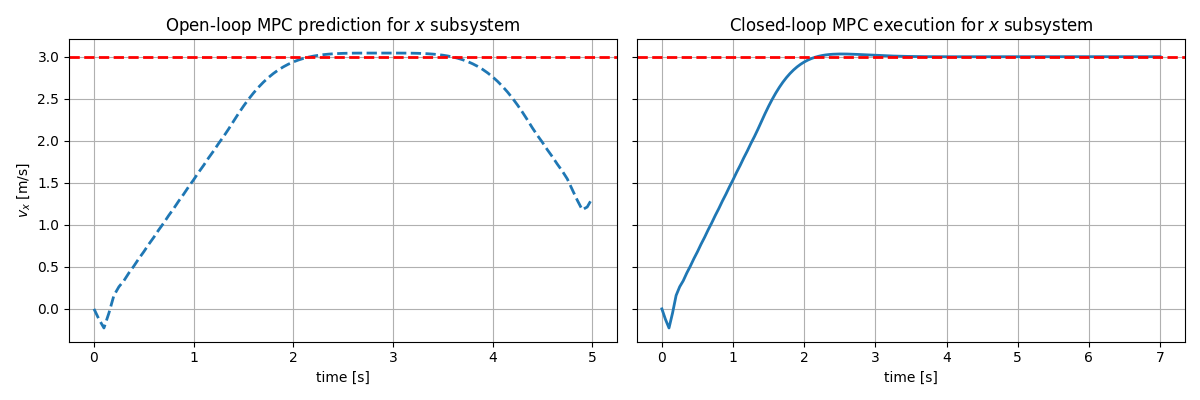

In [32]:
#Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

#Get Open-loop plot
axs[0].plot(t_ol, x_ol[6, :], '--', linewidth=2)
axs[0].axhline(x_target[6], color='r', linestyle='--', linewidth=2)
axs[0].set_title(r'Open-loop MPC prediction for $x$ subsystem')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel(r'$v_x$ [m/s]')
axs[0].grid(True)

#Get Closed-loop plot
axs[1].plot(t_cl, x_cl[6, :], '-', linewidth=2)
axs[1].axhline(x_target[6], color='r', linestyle='--', linewidth=2)
axs[1].set_title(r'Closed-loop MPC execution for $x$ subsystem')
axs[1].set_xlabel('time [s]')
axs[1].grid(True)

plt.tight_layout()
plt.show()

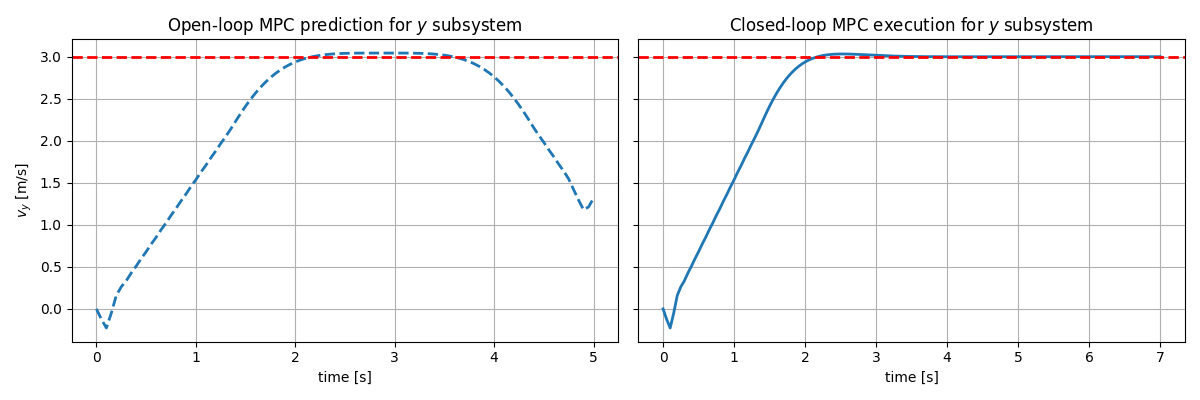

In [33]:
#Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

#Get Open-loop plot
axs[0].plot(t_ol, x_ol[7, :], '--', linewidth=2)
axs[0].axhline(x_target[7], color='r', linestyle='--', linewidth=2)
axs[0].set_title(r'Open-loop MPC prediction for $y$ subsystem')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel(r'$v_y$ [m/s]')
axs[0].grid(True)

#Get Closed-loop plot
axs[1].plot(t_cl, x_cl[7, :], '-', linewidth=2)
axs[1].axhline(x_target[7], color='r', linestyle='--', linewidth=2)
axs[1].set_title(r'Closed-loop MPC execution for $y$ subsystem')
axs[1].set_xlabel('time [s]')
axs[1].grid(True)

plt.tight_layout()
plt.show()

/var/folders/p8/my6b0l_n0_lb8tcl_nt3hc4h0000gn/T/ipykernel_6837/415477524.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)


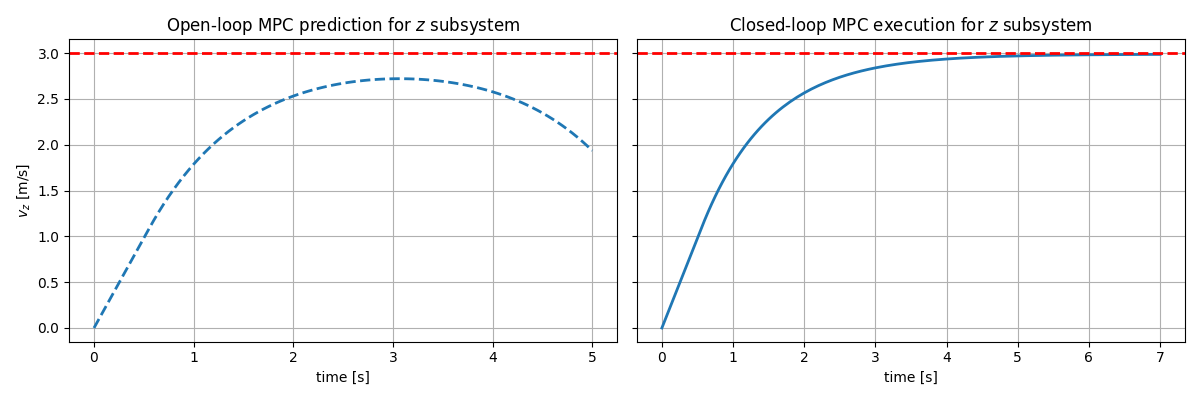

In [34]:
#Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

#Get Open-loop plot
axs[0].plot(t_ol, x_ol[8, :], '--', linewidth=2)
axs[0].axhline(x_target[8], color='r', linestyle='--', linewidth=2)
axs[0].set_title(r'Open-loop MPC prediction for $z$ subsystem')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel(r'$v_z$ [m/s]')
axs[0].grid(True)

#Get Closed-loop plot
axs[1].plot(t_cl, x_cl[8, :], '-', linewidth=2)
axs[1].axhline(x_target[8], color='r', linestyle='--', linewidth=2)
axs[1].set_title(r'Closed-loop MPC execution for $z$ subsystem')
axs[1].set_xlabel('time [s]')
axs[1].grid(True)

plt.tight_layout()
plt.show()

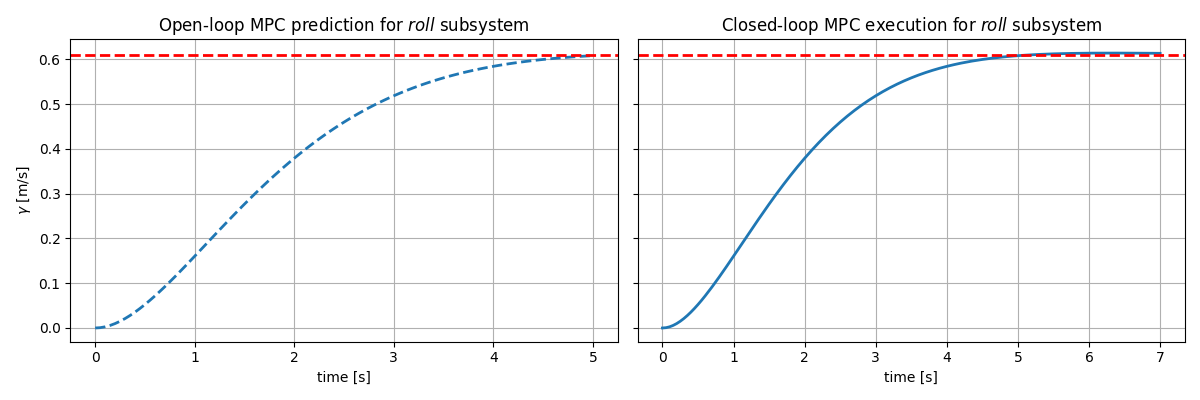

In [35]:
#Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

#Get Open-loop plot
axs[0].plot(t_ol, x_ol[5, :], '--', linewidth=2)
axs[0].axhline(x_target[5], color='r', linestyle='--', linewidth=2)
axs[0].set_title(r'Open-loop MPC prediction for $roll$ subsystem')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel(r'$\gamma$ [m/s]')
axs[0].grid(True)

#Get Closed-loop plot
axs[1].plot(t_cl, x_cl[5, :], '-', linewidth=2)
axs[1].axhline(x_target[5], color='r', linestyle='--', linewidth=2)
axs[1].set_title(r'Closed-loop MPC execution for $roll$ subsystem')
axs[1].set_xlabel('time [s]')
axs[1].grid(True)

plt.tight_layout()
plt.show()